**The Return on Investment of a College Education**

Catherine Du & Andrew Chuang, Group 5

**Introduction**

Thanks to skyrocketing tuition fees and increasingly competitive applicant pools, the value of a college education must be closely evaluated before making such life-changing decisions. As students who’ve experienced the stress of picking between elite institutions firsthand, we know that there are many factors that come into play. For instance, as we’re both STEM majors here at CMU, we’ve often wondered if our chances at competitive post-grad salaries are more affected by the fact that the majors themselves may be in high demand, or if CMU’s name drop on a resume can make a difference. Conversely, we were curious as to whether attending a higher ranked institution boosted the majors that typically have lower salaries. By doing this project and studying the data, we hope to come up with some answers and find out definitively if, and how much, a school’s ranking matters.


**Data Cleaning**

In [0]:
import pandas as pd

# enable tableau images to be imported
from IPython.display import Image

We are using datasets from Kaggle and College ScoreCard (CSC). The Kaggle file consists of three datasets. The first dataset tracks the median starting salary of 50 college majors nationwide. The second dataset tracks median starting salaries of ~200 colleges. The third dataset tracks median starting salaries by college region. 

The CSC dataset tracks the median starting salaries, as well as debt, for individual majors within 2000+ universities accross the US.

In [0]:
region = pd.read_csv('salaries-by-region.csv')
region_condensed = region.filter(["School Name", "Region"]) 
region_condensed.head()

,School Name,Region
0,Stanford University,California
1,California Institute of Technology (CIT),California
2,Harvey Mudd College,California
3,"University of California, Berkeley",California
4,Occidental College,California


In [0]:
college_type = pd.read_csv('salaries-by-college-type.csv')
ct_condensed = college_type.filter(["School Name", "School Type", "Starting Median Salary"])
ct_condensed = ct_condensed.drop_duplicates('School Name')
ct_condensed.head()

,School Name,School Type,Starting Median Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00"
2,Harvey Mudd College,Engineering,"$71,800.00"
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00"
4,Cooper Union,Engineering,"$62,200.00"


Here, we merge the Kaggle datasets by grouping of school type, as well as school region. We will not be using the Kaggle sets for the most part - this will serve as a baseline reference for the data we collect from the College ScoreCard dataset. Also, they grouped the colleges by region for us already, so that's convenient.

In [0]:

ct_and_region = pd.merge(ct_condensed, region_condensed)
ct_and_region = ct_and_region.dropna()
ct_and_region.head()

,School Name,School Type,Starting Median Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00",Northeastern
1,California Institute of Technology (CIT),Engineering,"$75,500.00",California
2,Harvey Mudd College,Engineering,"$71,800.00",California
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00",Northeastern
4,Cooper Union,Engineering,"$62,200.00",Northeastern


In [0]:
pay = pd.read_csv('degrees-that-pay-back.csv')
pay_short = pay.filter(['Undergraduate Major', 'Starting Median Salary'])
pay_short.head()

,Undergraduate Major,Starting Median Salary
0,Accounting,"$46,000.00"
1,Aerospace Engineering,"$57,700.00"
2,Agriculture,"$42,600.00"
3,Anthropology,"$36,800.00"
4,Architecture,"$41,600.00"


In [0]:
individuals = pd.read_csv('Most-Recent-Field-Data-Elements.csv')
individuals_short = individuals.filter(['INSTNM', 'CONTROL', 'CIPDESC', 'CREDDESC', 'DEBTMEDIAN', 'MD_EARN_WNE'])
individuals_short['INSTNM'] = individuals_short['INSTNM'].str.strip()
individuals_short.head()

,INSTNM,CONTROL,CIPDESC,CREDDESC,DEBTMEDIAN,MD_EARN_WNE
0,Alabama A & M University,Public,"Agriculture, General.",Bachelors Degree,PrivacySuppressed,PrivacySuppressed
1,Alabama A & M University,Public,Agricultural Business and Management.,Bachelors Degree,PrivacySuppressed,PrivacySuppressed
2,Alabama A & M University,Public,Animal Sciences.,Bachelors Degree,PrivacySuppressed,PrivacySuppressed
3,Alabama A & M University,Public,Food Science and Technology.,Bachelors Degree,PrivacySuppressed,PrivacySuppressed
4,Alabama A & M University,Public,Food Science and Technology.,Master's Degree,PrivacySuppressed,PrivacySuppressed


The Data cleaning process was lengthy. From the CSC dataset, we first filtered out NULL and PrivacySuppressed values, and made sure we were only looking at 4-year bachelor's degrees. We converted the median salaries and debts into integers, since they had been presented as strings.

In [0]:

filtered = individuals_short[~individuals_short.isin(['PrivacySuppressed'])]
filtered2 = filtered[filtered['CREDDESC'].isin(['Bachelors Degree'])]
filtered3 = filtered2.dropna()
filtered3['MD_EARN_WNE'] = filtered3['MD_EARN_WNE'].astype(int)
filtered3['DEBTMEDIAN'] = filtered3['DEBTMEDIAN'].astype(int)
filtered3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,INSTNM,CONTROL,CIPDESC,CREDDESC,DEBTMEDIAN,MD_EARN_WNE
15,Alabama A & M University,Public,"Computer and Information Sciences, General.",Bachelors Degree,36250,54300
24,Alabama A & M University,Public,Teacher Education and Professional Development...,Bachelors Degree,31505,25400
27,Alabama A & M University,Public,"Electrical, Electronics and Communications Eng...",Bachelors Degree,34809,54500
28,Alabama A & M University,Public,Mechanical Engineering.,Bachelors Degree,36928,45800
37,Alabama A & M University,Public,"Liberal Arts and Sciences, General Studies and...",Bachelors Degree,29956,24000


Next, we conducted a search and replace on the various majors present in the dataset. Many of the majors were essentially the same, with a slight variation on the name, so we mapped them to all fall under one category. An example is 'Education, General.' vs 'Education, Other.' Both fall under the 'Education' major, so we just replaced their values in the dataset accordingly. It should be noted that we used the 50 majors present in the Kaggle majors dataset as our baseline categories.

In [0]:
mapping = {"Accounting and Related Services.": "Accounting", "Taxation.": "Accounting", "Insurance." : "Accounting",
           "Aerospace, Aeronautical and Astronautical Engineering.": "Aerospace Engineering", "Astronomy and Astrophysics." : "Aerospace Engineering",
           "Agriculture, Agriculture Operations, and Related Sciences, Other." : "Agriculture", 
           "Agricultural Engineering." : "Agriculture", "Agricultural Business and Management." : "Agriculture",
           "Agricultural Production Operations." : "Agriculture", "Agricultural and Domestic Animal Services." : "Agriculture", "Agriculture, General." : "Agriculture",
           "Agricultural and Food Products Processing." : "Agriculture", "Archeology." : "Anthropology", "Anthropology." : "Anthropology",
           "Ethnic, Cultural Minority, Gender, and Group Studies." : "Anthropology", "Cultural Studies/Critical Theory and Analysis." : "Anthropology", 
           "Intercultural/Multicultural and Diversity Studies." : "Anthropology", "East Asian Languages, Literatures, and Linguistics." : "Anthropology",
           "Architectural Engineering Technologies/Technicians." : "Architecture", "Architecture." : "Architecture", "Landscape Architecture." : "Architecture",
           "Architectural Sciences and Technology." : "Architecture", "Drafting/Design Engineering Technologies/Technicians." : "Architecture", "Interior Architecture." : "Architecture",
           "Architecture and Related Services, Other." : "Architecture", "Fine and Studio Arts." : "Art History","Biology, General." : "Biology",
           "Clinical/Medical Laboratory Science/Research and Allied Professions." : "Biology", "Marine Transportation." : "Biology", 
           "Animal Sciences." : "Biology", "Pharmacology and Toxicology." : "Biology", 
           "Food Science and Technology." : "Biology", "Environmental Design." : "Biology", "Microbiological Sciences and Immunology." : "Biology", 
           "Cell/Cellular Biology and Anatomical Sciences." : "Biology", "Natural Sciences." : "Biology", "Plant Sciences." : "Biology", "Biological and Physical Sciences." : "Biology",
           "Ecology, Evolution, Systematics, and Population Biology." : "Biology", "Zoology/Animal Biology." : "Biology", "Applied Horticulture and Horticultural Business Services." : "Biology",
           "Physiology, Pathology and Related Sciences." : "Biology", "Biochemistry, Biophysics and Molecular Biology." : "Biology", "Biological and Biomedical Sciences, Other." : "Biology",
           "Biotechnology." : "Biology", "Neurobiology and Neurosciences." : "Biology", "Gerontology." : "Biology",
           "Human Biology.": "Biology", "Business Administration, Management and Operations." : "Business Management", "Business/Commerce, General." : "Business Management",
           "Business Operations Support and Assistant Services." : "Business Management", "International Business." : "Business Management", 
           "Business, Management, Marketing, and Related Support Services, Other." : "Business Management", "Entrepreneurial and Small Business Operations." : "Business Management",
           "Materials Engineering" : "Chemical Engineering", "Petroleum Engineering." : "Chemical Engineering", "Ocean Engineering." : "Chemical Engineering", "Nuclear Engineering." : "Chemical Engineering", "Biomedical/Medical Engineering." : "Chemical Engineering",
           "Quality Control and Safety Technologies/Technicians.": "Chemical Engineering", "Nuclear and Industrial Radiologic Technologies/Technicians." : "Chemical Engineering",
           "Environmental/Environmental Health Engineering." : "Chemical Engineering", "Mining and Petroleum Technologies/Technicians." : "Chemical Engineering", 
           "Polymer/Plastics Engineering." : "Chemical Engineering", "Textile Sciences and Engineering." : "Chemical Engineering", "Naval Architecture and Marine Engineering." : "Chemical Engineering",
           "Metallurgical Engineering." : "Chemical Engineering", "Chemical Engineering." : "Chemical Engineering", "Biological/Biosystems Engineering." : "Chemical Engineering", "Science Technologies/Technicians, Other." : "Chemistry",
           "Chemistry." : "Chemistry", "Civil Engineering." : "Civil Engineering", "Urban Studies/Affairs." : "Civil Engineering",
           "Air Transportation." : "Civil Engineering", "City/Urban, Community and Regional Planning." : "Civil Engineering", "Sustainability Studies." : "Civil Engineering", 
           "Communication Disorders Sciences and Services.":"Communications", "Communication and Media Studies.": "Communications", "Public Relations, Advertising, and Applied Communication." : "Communications",
           "Business/Corporate Communications." : "Communications", "Radio, Television, and Digital Communication." : "Communications", "Communication, Journalism, and Related Programs, Other." : "Communications",
           "Audiovisual Communications Technologies/Technicians." : "Communications", "Engineering Technologies/Technicians, Other." : "Computer Engineering", "Engineering-Related Fields." : "Computer Engineering",
           "Computer Engineering." : "Computer Engineering", "Computer Engineering Technologies/Technicians." : "Computer Engineering", "Computer and Information Sciences, General." : "Computer Science", 
           "Computer Science." : "Computer Science", "Biomathematics, Bioinformatics, and Computational Biology." : "Computer Science", "Computer Software and Media Applications." : "Computer Science",
           "Human Computer Interaction." : "Computer Science", "Computer Programming." : "Computer Science", "Computer Systems Analysis." : "Computer Science", "Construction Trades, Other." : "Construction",
           "Construction Trades, General." : "Construction", "Building/Construction Finishing, Management, and Inspection." : "Construction", "Construction Management." : "Construction", 
           "Construction Engineering Technologies." : "Construction", "Housing and Human Environments." : "Construction", "Criminal Justice and Corrections." : "Criminal Justice", "Criminology" : "Criminal Justice",
           "Homeland Security." : "Criminal Justice", "Homeland Security, Law Enforcement, Firefighting and Related Protective Services, Other." : "Criminal Justice", "Legal Professions and Studies, Other." : "Criminal Justice",
           "Dance." : "Drama", "Visual and Performing Arts, Other." : "Drama", "Drama/Theatre Arts and Stagecraft." : "Drama", "Visual and Performing Arts, General." : "Drama", "Business/Managerial Economics." : "Economics", 
           "Economics." : "Economics", "Teacher Education and Professional Development, Specific Subject Areas." : "Education", "Educational Administration and Supervision." : "Education", "Special Education and Teaching." : "Education",
           "Student Counseling and Personnel Services." : "Education", "Teacher Education and Professional Development, Specific Levels and Methods." : "Education", "Teaching English or French as a Second or Foreign Language." : "Education",
           "Library Science and Administration." : "Education", "Education, General." : "Education", "Educational Assessment, Evaluation, and Research." : "Education", "Curriculum and Instruction." : "Education", 
           "Education, Other." : "Education", "International and Comparative Education." : "Education", "Electrical, Electronics and Communications Engineering." : "Electrical Engineering",
           "Electrical Engineering Technologies/Technicians." : "Electrical Engineering", "Liberal Arts and Sciences, General Studies and Humanities." : "English", 
           "English Language and Literature, General." :"English", "Literature." : "English", "English Language and Literature/Letters, Other." : "English",
           "Multi-/Interdisciplinary Studies, General." : "English", "Rhetoric and Composition/Writing Studies." : "English", "Multi/Interdisciplinary Studies, Other." : "English",
           "Linguistic, Comparative, and Related Language Studies and Services." : "English", "American Sign Language." : "English", 
           "Film/Video and Photographic Arts." : "Film", "Arts, Entertainment,and Media Management." : "Film", "Finance and Financial Management Services." : "Finance",
           "Natural Resources Conservation and Research." : "Forestry", "Fire Protection." : "Forestry", "Forestry." : "Forestry", "Wildlife and Wildlands Science and Management." : "Forestry",
           "Environmental Control Technologies/Technicians." : "Forestry", "Natural Resources Management and Policy" : "Forestry", "Soil Sciences." : "Forestry",
           "Natural Resources and Conservation, Other." : "Forestry", "Geography and Cartography." : "Geography", "Area Studies." : "Geography",
           "Geological/Geophysical Engineering." : "Geology", "Geological and Earth Sciences/Geosciences." : "Geology", 
           "Mining and Mineral Engineering." : "Geology", "Design and Applied Arts." : "Graphic Design", "Graphic Communications." : "Graphic Design",
           "Apparel and Textiles." : "Graphic Design", "Health and Medical Administrative Services." : "Health Care Administration", 
           "Allied Health Diagnostic, Intervention, and Treatment Professions." : "Health Care Administration", "Public Health." : "Health Care Administration",
           "Rehabilitation and Therapeutic Professions." : "Health Care Administration", "Health and Physical Education/Fitness." : "Health Care Administration",
           "Pharmacy, Pharmaceutical Sciences, and Administration." : "Health Care Administration", "Dental Support Services and Allied Professions." : "Health Care Administration",
           "Health/Medical Preparatory Programs." : "Health Care Administration", "Health Services/Allied Health/Health Sciences, General." : "Health Care Administration",
           "Mental and Social Health Services and Allied Professions." : "Health Care Administration", "Alternative and Complementary Medicine and Medical Systems." : "Health Care Administration",
           "History." : "History", "Legal Support Services." : "Hospitality & Tourism", "Human Resources Management and Services." : "Hospitality & Tourism", 
           "Human Development, Family Studies, and Related Services.": "Hospitality & Tourism", "Hospitality Administration/Management." : "Hospitality & Tourism",
           "Personal and Culinary Services, Other." : "Hospitality & Tourism", "Human Services, General." : "Hospitality & Tourism", 
           "Parks, Recreation and Leisure Studies." : "Hospitality & Tourism", "Parks, Recreation and Leisure Facilities Management." : "Hospitality & Tourism",
           "Real Estate." : "Hospitality & Tourism", "Parks, Recreation, Leisure, and Fitness Studies, Other." : "Hospitality & Tourism",
           "Culinary Arts and Related Services." : "Hospitality & Tourism", "Leisure and Recreational Activities." : "Hospitality & Tourism",
           "Industrial Production Technologies/Technicians." : "Industrial Engineering", "Industrial Engineering." : "Industrial Engineering",
           "Computer Systems Networking and Telecommunications." : "Information Technology (IT)", "Computer/Information Technology Administration and Management." : "Information Technology (IT)",
           "Communications Technology/Technician." : "Information Technology (IT)", "Data Processing." : "Information Technology (IT)",
           "Communications Technologies/Technicians and Support Services, Other." : "Information Technology (IT)",
           "Computer and Information Sciences and Support Services, Other." : "Information Technology (IT)", "Engineering Technology, General." : "Information Technology (IT)",
           "Family and Consumer Sciences/Human Sciences, General." : "Interior Design", "Family and Consumer Sciences/Human Sciences Business Services." : "Interior Design",
           "Family and Consumer Economics and Related Studies." : "Interior Design", "International Relations and National Security Studies." : "International Relations",
           "Peace Studies and Conflict Resolution." : "International Relations", "International/Global Studies." : "International Relations",
           "Journalism." : "Journalism", "Management Information Systems and Services." :"Management Information Systems (MIS)", 
           "Management Sciences and Quantitative Methods." : "Management Information Systems (MIS)", "Information Science/Studies." : "Management Information Systems (MIS)",
          "General Sales, Merchandising and Related Marketing Operations." : "Marketing", "Marketing." : "Marketing", "Specialized Sales, Merchandising and  Marketing Operations." : "Marketing",
           "Operations Research." : "Math", "Applied Mathematics." : "Math", "Statistics." : "Math", "Mathematics." : "Math", "Mathematics and Computer Science." : "Math",
           "Mechanical Engineering." : "Mechanical Engineering", "Vehicle Maintenance and Repair Technologies." : "Mechanical Engineering",
           "Engineering, General." : "Mechanical Engineering", "Mechanical Engineering Related Technologies/Technicians." : "Mechanical Engineering",
           "Engineering Science." : "Mechanical Engineering", "Engineering, other." : "Mechanical Engineering", "Systems Engineering" : "Mechanical Engineering",
           "Music." : "Music", "Registered Nursing, Nursing Administration, Nursing Research and Clinical Nursing." : "Nursing", 
           "Nursing." : "Nursing", "Foods, Nutrition, and Related Services." : "Nutrition", "Nutrition Sciences." : "Nutrition", 
           "Dietetics and Clinical Nutrition Services." : "Nutrition", "Philosophy." : "Philosophy", 
           "Health Professions and Related Clinical Sciences, Other." : "Physician Assistant", "Allied Health and Medical Assisting Services." : "Physician Assistant",
           "Systems Science and Theory" : "Physics", "Physics." : "Physics", "Physical Sciences." : "Physics", "Engineering Physics." : "Physics",
           "Public Administration." : "Political Science", "Community Organization and Advocacy." : "Political Science", "Public Policy Analysis." : "Political Science",
           "Public Administration and Social Service Professions, Other." : "Political Science", "Non-Professional General Legal Studies (Undergraduate)." : "Political Science",
           "Political Science and Government." : "Political Science", "Clinical, Counseling and Applied Psychology." : "Psychology", "Psychology, General." : "Psychology",
           "Behavioral Sciences." : "Psychology", "Cognitive Science." : "Psychology", "Psychology, Other." : "Psychology", "Research and Experimental Psychology." : "Psychology",
           "Religious Education." : "Religion", "Theological and Ministerial Studies." : "Religion", "Bible/Biblical Studies." : "Religion",
           "Theology and Religious Vocations, Other." : "Religion", "Pastoral Counseling and Specialized Ministries." : "Religion",
           "Religion/Religious Studies." : "Religion", "Social Work." : "Sociology", "Sociology." : "Sociology", "Social Sciences, Other." : "Sociology",
           "Social Sciences, General." :"Sociology", "Science, Technology and Society." : "Sociology", "Sociology and Anthropology." : "Sociology",
           "Romance Languages, Literatures, and Linguistics." : "Spanish", "Foreign Languages, Literatures, and Linguistics, Other." : "Spanish",
           "Systems Science and Theory."  : "Physics", "Systems Engineering." : "Mechanical Engineering", "Architectural Engineering." : "Architecture",
           "Materials Sciences." : "Chemical Engineering", "Criminology." : "Criminal Justice", "Natural Resources Management and Policy." : "Forestry",
           "Manufacturing Engineering." : "Mechanical Engineering", "Construction Engineering." : "Construction", 
           "Biochemical Engineering." : "Chemical Engineering", "Funeral Service and Mortuary Science." : "Biology",
           "Mathematics and Statistics, Other." : "Math", "Atmospheric Sciences and Meteorology." : "Biology",
           "Agricultural Mechanization." : "Agriculture", "Engineering, Other." : "Mechanical Engineering", "Mathematics" : "Math",
            "Genetics." : "Biology", "International Agriculture." : "Agriculture", "Agricultural Public Services." : "Agriculture",
          "Civil Engineering Technologies/Technicians." : "Civil Engineering", "High School/Secondary Diploma Programs." : "Education",
           "Biopsychology." : "Psychology", "Electromechanical Engineering." : "Electrical Engineering",
           "Crafts/Craft Design, Folk Art and Artisanry." : "Art History", "Fishing and Fisheries Sciences and Management." : "Forestry",
           "Germanic Languages, Literatures, and Linguistics." : "Spanish", "Medical Illustration and Informatics." : "Health Care Administration",
           "Veterinary Biomedical and Clinical Sciences." : "Physician Assistant", 
           "Electromechanical Instrumentation and Maintenance Technologies/Technicians." : "Electrical Engineering",
           "Practical Nursing, Vocational Nursing and Nursing Assistants." : "Nursing", "Philosophy and Religious Studies, Other." : "Philosophy",
           "Legal Research and Advanced Professional Studies." : "Criminal Justice", "Intelligence, Command Control and Information Operations." : "Information Technology (IT)",
           "Specialized Sales, Merchandising and Marketing Operations." : "Marketing", "Health-Related Knowledge and Skills." : "Health Care Administration",
           "Historic Preservation and Conservation." : "Hospitality & Tourism", "Bilingual, Multilingual, and Multicultural Education." : "Education",
           "Religious/Sacred Music." : "Music", "Physical Sciences, Other." : "Physics", "Engineering Mechanics." : "Mechanical Engineering",
           "Slavic, Baltic and Albanian Languages, Literatures, and Linguistics." : "Spanish", "Rural Sociology." : "Sociology",
           "Marine Sciences." : "Biology", "Cosmetology and Related Personal Grooming Services." : "Health Care Administration",
           "Forest Engineering." : "Forestry"
           
           
           }
           
           

In [0]:
final_filter = filtered3.replace({"CIPDESC": mapping})
final_filter.head()

,INSTNM,CONTROL,CIPDESC,CREDDESC,DEBTMEDIAN,MD_EARN_WNE
15,Alabama A & M University,Public,Computer Science,Bachelors Degree,36250,54300
24,Alabama A & M University,Public,Education,Bachelors Degree,31505,25400
27,Alabama A & M University,Public,Electrical Engineering,Bachelors Degree,34809,54500
28,Alabama A & M University,Public,Mechanical Engineering,Bachelors Degree,36928,45800
37,Alabama A & M University,Public,English,Bachelors Degree,29956,24000


We continued our data cleaning by grouping the 50 majors in the Kaggle dataset as either a STEM or a humanities major.

In [0]:

def categorize_by_stem(row):
  if (row['CIPDESC'] == "Computer Science" or row['CIPDESC'] == "Accounting" or row['CIPDESC'] == "Aerospace Engineering" or
  row['CIPDESC'] == "Agriculture" or row['CIPDESC'] == "Biology" or row['CIPDESC'] == "Chemical Engineering" or row['CIPDESC'] == "Chemistry" or 
  row['CIPDESC'] == "Computer Engineering" or row['CIPDESC'] == "Construction" or row['CIPDESC'] == "Civil Engineering" or
  row['CIPDESC'] == "Electrical Engineering" or row['CIPDESC'] == "Finance" or row['CIPDESC'] == "Forestry" or 
  row['CIPDESC'] == "Geology" or row['CIPDESC'] == "Geography" or row['CIPDESC'] == "Health Care Administration" or 
  row['CIPDESC'] == "Industrial Engineering" or row['CIPDESC'] == "Information Technology (IT)" or 
  row['CIPDESC'] == "Management Information Systems (MIS)" or row['CIPDESC'] == "Marketing" or 
  row['CIPDESC'] == "Math" or row['CIPDESC'] == "Mechanical Engineering" or row['CIPDESC'] == "Nursing" or 
  row['CIPDESC'] == "Physician Assistant" or row['CIPDESC'] == "Physics" or row['CIPDESC'] == "Nutrition"):
    return "STEM"
  elif (row['CIPDESC'] == "Anthropology" or row['CIPDESC'] == "Architecture" or row['CIPDESC'] == "Art History" or 
  row['CIPDESC'] == "Business Management" or row['CIPDESC'] == "Communications" or 
  row['CIPDESC'] == "Criminal Justice" or row['CIPDESC'] == "Drama" or row['CIPDESC'] == "Economics" or 
  row['CIPDESC'] == "Education" or row['CIPDESC'] == "English" or row['CIPDESC'] == "Film" or 
  row['CIPDESC'] == "Graphic Design" or row['CIPDESC'] == "History" or row['CIPDESC'] == "Hospitality & Tourism" or 
  row['CIPDESC'] == "Interior Design" or row['CIPDESC'] == "International Relations" or 
  row['CIPDESC'] == "Journalism" or row['CIPDESC'] == "Music" or row['CIPDESC'] == "Philosophy" or 
  row['CIPDESC'] == "Political Science" or row['CIPDESC'] == "Psychology" or row['CIPDESC'] == "Religion" or 
  row['CIPDESC'] == "Sociology" or row['CIPDESC'] == "Spanish"):
    return "Humanities"
  else:
    return "Wrong"




In [0]:
final_filter['Major Category'] = final_filter.apply (lambda row: categorize_by_stem(row), axis=1)
final_filter.head()

,INSTNM,CONTROL,CIPDESC,CREDDESC,DEBTMEDIAN,MD_EARN_WNE,Major Category
15,Alabama A & M University,Public,Computer Science,Bachelors Degree,36250,54300,STEM
24,Alabama A & M University,Public,Education,Bachelors Degree,31505,25400,Humanities
27,Alabama A & M University,Public,Electrical Engineering,Bachelors Degree,34809,54500,STEM
28,Alabama A & M University,Public,Mechanical Engineering,Bachelors Degree,36928,45800,STEM
37,Alabama A & M University,Public,English,Bachelors Degree,29956,24000,Humanities


In [0]:
#check to see if we missed any NULL values or didn't add all the unique majors into the dictionary
final_filter.loc[final_filter['CIPDESC'] == 'Wrong']

,INSTNM,CONTROL,CIPDESC,CREDDESC,DEBTMEDIAN,MD_EARN_WNE,Major Category


We grouped the institutions present in the CSC datset by rankings. Specifically, we used *Ivy League*, *Top Non-Ivy* (a school present among US News' Top 30, but that wasn't also an Ivy), *liberal arts*, and *other*. It should be noted that we only marked the liberal arts schools from US News' top rankings as *liberal arts*, so there could be other liberal arts schools in the *other* category.

The last additional column we calculated was the debt to salary ratio; we divided the median debt by the median starting salary.

In [0]:

def top30(row):
  if (row['INSTNM'] == 'Carnegie Mellon University' or
      row['INSTNM'] == 'Massachusetts Institute of Technology' or 
      row['INSTNM'] == 'Stanford University' or row['INSTNM'] == 'Northwestern University' or 
      row['INSTNM'] == 'University of Chicago' or 
      row['INSTNM'] == 'Duke University' or row['INSTNM'] == 'Vanderbilt University' or row['INSTNM'] == 'Johns Hopkins University' or 
      row['INSTNM'] == 'University of Notre Dame' or row['INSTNM'] == 'Rice University' or 
      row['INSTNM'] == 'Emory University' or row['INSTNM'] == 'Georgetown University' or 
      row['INSTNM'] == 'Wake Forest University' or row['INSTNM'] == 'University of California-Berkeley' or row['INSTNM'] == 'New York University' or 
      row['INSTNM'] == 'Tufts University' or row['INSTNM'] == 'University of Rochester' or row['INSTNM'] == 'University of Southern California' or 
      row['INSTNM'] == 'Washington University in St Louis' or row['INSTNM'] == 'University of California-Los Angeles' or 
      row['INSTNM'] == 'University of Michigan-Ann Arbor' or row['INSTNM'] == 'University of North Carolina at Chapel Hill'
      ) or row['INSTNM'] == 'University of Virginia-Main Campus':
    return "Top Non-Ivy"
  elif (row['INSTNM'] == 'Harvard University' or row['INSTNM'] == 'Columbia College' or row['INSTNM'] == 'Dartmouth College'
  or row['INSTNM'] == 'Brown University' or row['INSTNM'] == 'Cornell University' or row['INSTNM'] == 'Yale University' or
  row['INSTNM'] == 'University of Pennsylvania'):
    return 'Ivy League'
  elif (row['INSTNM'] == 'Bucknell University' or row['INSTNM'] == 'Colgate University' or 
        row['INSTNM'] == 'Amherst College' or row['INSTNM'] == 'Lafayette College' or 
        row['INSTNM'] == 'Bowdoin College' or 
        row['INSTNM'] == 'College of the Holy Cross' or 
        row['INSTNM'] == 'Occidental College' or row['INSTNM'] == 'Washington and Lee University' or 
        row['INSTNM'] == 'Swarthmore College' or row['INSTNM'] == 'Carleton College' or 
        row['INSTNM'] == 'Davidson College' or row['INSTNM'] == 'Williams College' or 
        row['INSTNM'] == 'Wesleyan University' or row['INSTNM'] == 'Pomona College' or 
        row['INSTNM'] == 'Bates College' or row['INSTNM'] == 'Union College' or  
        row['INSTNM'] == 'University of Richmond' or row['INSTNM'] == 'Vassar College' or 
        row['INSTNM'] == 'Middlebury College' or row['INSTNM'] == 'Mount Holyoke College' or 
        row['INSTNM'] == 'Franklin and Marshall College' or row['INSTNM'] == 'DePauw University' or 
        row['INSTNM'] == 'St Olaf College' or row['INSTNM'] == 'Colby College' or 
        row['INSTNM'] == 'Gettysburg College' or row['INSTNM'] == 'Siena College' or 
        row['INSTNM'] == 'Smith College' or row['INSTNM'] == 'Hamilton College' or 
        row['INSTNM'] == 'Randolph-Macon College' or row['INSTNM'] == 'Wellesley College' or 
        row['INSTNM'] == 'Denison University' or row['INSTNM'] == 'Oberlin College' or 
        row['INSTNM'] == 'Colorado College' or row['INSTNM'] == 'University of Puget Sound' or 
        row['INSTNM'] == 'Reed College' or row['INSTNM'] == 'Whitman College' or 
        row['INSTNM'] == 'Gustavus Adolphus College' or row['INSTNM'] == 'Ursinus College' or
        row['INSTNM'] == 'Juniata College' or row['INSTNM'] == 'Wittenberg University' or 
        row['INSTNM'] == 'Grinnell College' or row['INSTNM'] == 'Skidmore College' or 
        row['INSTNM'] == 'Moravian College' or row['INSTNM'] == 'Lewis & Clark College' or 
        row['INSTNM'] == 'Fort Lewis College' or row['INSTNM'] == 'Thomas Aquinas College' or 
        row['INSTNM'] == 'The Evergreen State College'): 
    return 'Liberal Arts'
  else:
    return "Other"

In [0]:
final_filter['Top Schools'] = final_filter.apply (lambda row: top30(row), axis=1)
final_filter['Debt to Salary Ratio'] = final_filter['DEBTMEDIAN'] / (final_filter['MD_EARN_WNE'])
final_filter.head()

,INSTNM,CONTROL,CIPDESC,CREDDESC,DEBTMEDIAN,MD_EARN_WNE,Major Category,Top Schools,Debt to Salary Ratio
15,Alabama A & M University,Public,Computer Science,Bachelors Degree,36250,54300,STEM,Other,0.667587
24,Alabama A & M University,Public,Education,Bachelors Degree,31505,25400,Humanities,Other,1.240354
27,Alabama A & M University,Public,Electrical Engineering,Bachelors Degree,34809,54500,STEM,Other,0.638697
28,Alabama A & M University,Public,Mechanical Engineering,Bachelors Degree,36928,45800,STEM,Other,0.806288
37,Alabama A & M University,Public,English,Bachelors Degree,29956,24000,Humanities,Other,1.248167


Lastly, we merged the CSC dataset with the combined Kaggle dataset so we could include the school location in our analysis. Since many school names were different on the Kaggle dataset vs CSC dataset, we conducted another search and replace so the inner join wouldn't miss any schools.

It should be noted, however, that the merge caused most of the schools in the CSC dataset to disappear because they weren't in the Kaggle dataset at all, so we used this merged file sparingly.

In [0]:
ct_and_region['School Name'].replace({'Massachusetts Institute of Technology (MIT)': 'Massachusetts Institute of Technology', 
                   'California Institute of Technology (CIT)': 'California Institute of Technology',
                   'Polytechnic University of New York, Brooklyn' : 'New York University', 
                   'Cooper Union': 'Cooper Union for the Advancement of Science and Art',
                   'Worcester Polytechnic Institute (WPI)' : 'Worcester Polytechnic Institute',
                   "Carnegie Mellon University (CMU)" : "Carnegie Mellon University",
                   "Rensselaer Polytechnic Institute (RPI)" : "Rensselaer Polytechnic Institute",
                   "Evergreen State College" : "The Evergreen State College",
                   "St. Olaf College" : "St Olaf College", "Wesleyan University (Middletown, Connecticut)" : 
                   "Wesleyan University", "Illinois Institute of Technology (IIT)" : "Illinois Institute of Technology",
                   "Virginia Polytechnic Institute and State University (Virginia Tech)" : "Virginia Polytechnic Institute and State University",
                   "South Dakota School of Mines & Technology" : "South Dakota School of Mines and Technology",
                   "New Mexico Institute of Mining and Technology (New Mexico Tech)" : "New Mexico Institute of Mining and Technology",
                   "Rochester Institute of Technology (RIT)" : "Rochester Institute of Technology",
                   "Embry-Riddle Aeronautical University (ERAU)" : "Embry-Riddle Aeronautical University-Daytona Beach",
                   "University of Illinois at Urbana-Champaign (UIUC)" : "University of Illinois at Urbana-Champaign",
                   "University of Maryland, College Park" : "University of Maryland-College Park",
                   "University of California, Santa Barbara (UCSB)" : "University of California-Santa Barbara",
                   "University of Texas (UT) - Austin" : "The University of Texas at Austin",
                   "State University of New York (SUNY) at Albany" : "SUNY at Albany",
                   "University of Florida (UF)" : "University of Florida", "Louisiana State University (LSU)" : "Louisiana State University and Agricultural & Mechanical College",
                   "University of Georgia (UGA)" : "University of Georgia", "Pennsylvania State University (PSU)" : "Pennsylvania State University-Main Campus",
                   "Arizona State University (ASU)" : "Arizona State University-Downtown Phoenix",
                   "Indiana University (IU), Bloomington" : "Indiana University-Bloomington", "University of Iowa (UI)" : "University of Iowa",
                   "University of Alabama, Tuscaloosa" : "The University of Alabama", "University of New Hampshire (UNH)" : "University of New Hampshire-Main Campus",
                   "West Virginia University (WVU)" : "West Virginia University", "Florida State University (FSU)" : "Florida State University",
                   "University of California, Berkeley" : "University of California-Berkeley", 
                   "University of Virginia (UVA)" : "University of Virginia-Main Campus", "Cal Poly San Luis Obispo" : "California Polytechnic State University-San Luis Obispo",
                   "University of California at Los Angeles (UCLA)" : "University of California-Los Angeles", 
                   "University of California, San Diego (UCSD)" : "University of California-San Diego",
                   "University of California, Davis" : "University of California-Davis", "University of Colorado - Boulder (UCB)" : "University of Colorado Boulder",
                   "University of California, Irvine (UCI)" : "University of California-Irvine",
                   "Texas A&M University" : "Texas A & M University-College Station", 
                   "University of Missouri - Rolla (UMR)" : "Missouri University of Science and Technology",
                   "San Jose State University (SJSU)" : "San Jose State University",
                   "University of Michigan" : "University of Michigan-Ann Arbor",
                   "University of Connecticut (UConn)" : "University of Connecticut", "University of Massachusetts (UMass) - Amherst" : "University of Massachusetts-Amherst",
                   "California State University (CSU), Chico" : "California State University-Chico",
                   "University of Wisconsin (UW) - Madison" : "University of Wisconsin-Madison",
                   "California State University, Fullerton (CSUF)" : "California State University-Fullerton",
                   "University of Massachusetts (UMass) - Lowell" : "University of Massachusetts-Lowell",
                   "San Francisco State University (SFSU)" : "San Francisco State University",
                   "University of Washington (UW)" : "University of Washington-Seattle Campus",
                   "Michigan State University (MSU)" : "Michigan State University",
                   "University of Rhode Island (URI)" : "University of Rhode Island",
                   "San Diego State University (SDSU)" : "San Diego State University",
                   "Washington State University (WSU)" : "Washington State University",
                   "California State University, Long Beach (CSULB)" : "California State University-Long Beach",
                   "University of Colorado - Denver" : "University of Colorado Denver",
                   "California State University, East Bay (CSUEB)" : "California State University-East Bay",
                   "State University of New York (SUNY) at Farmingdale" : "Farmingdale State College",
                   "University of Minnesota" : "University of Minnesota-Twin Cities",
                   "University of California, Santa Cruz (UCSC)" : "University of California-Santa Cruz",
                   "Ohio State University (OSU)" : "Ohio State University-Main Campus",
                   "North Carolina State University (NCSU)" : "North Carolina State University at Raleigh",
                   "Oregon State University (OSU)" : "Oregon State University", "University of Nevada, Reno (UNR)" : "University of Nevada-Reno",
                   "University of Oklahoma" : "University of Oklahoma-Norman Campus", "University of Vermont (UVM)" : "University of Vermont",
                   "University of Alabama at Huntsville (UAH)" : "University of Alabama in Huntsville",
                   "California State University, Sacramento (CSUS)" : "California State University-Sacramento",
                   "State University of New York (SUNY) at Buffalo" : "SUNY at Buffalo State",
                   "University of New Mexico (UNM)" : "University of New Mexico-Main Campus",
                   "University of North Carolina at Chapel Hill (UNCH)" : "University of North Carolina at Chapel Hill",
                   "University of California, Riverside (UCR)" : "University of California-Riverside",
                   "State University of New York (SUNY) at Geneseo" : "SUNY College at Geneseo",
                   "University of Missouri - Columbia" : "University of Missouri-Columbia",
                   "University of Nebraska" : "University of Nebraska-Lincoln", "California State University, Northridge (CSUN)" : "California State University-Northridge",
                   "University of Texas at Arlington (UTA)" : "The University of Texas at Arlington",
                   "Northern Illinois University (NIU)" : "Northern Illinois University",
                   "Oklahoma State University" : "Oklahoma State University-Main Campus", 
                   "University of Houston (UH)" : "University of Houston", "New Mexico State University" : "New Mexico State University-Main Campus",
                   "Mississippi State University (MSU)" : "Mississippi State University", "Colorado State University (CSU)" : "Colorado State University-Fort Collins",
                   "Kansas State University (KSU)" : "Kansas State University", "University of Wyoming (UW)" : "University of Wyoming",
                   "University of Wisconsin (UW) - Platteville" : "University of Wisconsin-Platteville",
                   "University of Massachusetts (UMass) - Boston" : "University of Massachusetts-Boston",
                   "University of Maryland Baltimore County (UMBC)" : "University of Maryland-Baltimore County",
                   "North Dakota State University (NDSU)" : "North Dakota State University-Main Campus",
                   "State University of New York (SUNY) at Oswego" : "SUNY College at Oswego", 
                   "University of Massachusetts (UMass) - Dartmouth" : "University of Massachusetts-Dartmouth",
                   "Montana State University - Bozeman" : "Montana State University",
                   "State University of New York (SUNY) at Oneonta" : "SUNY Oneonta",
                   "University of Louisiana (UL) at Lafayette" : "University of Louisiana at Lafayette",
                   "State University of New York (SUNY) at Plattsburgh" : "SUNY College at Plattsburgh",
                   "University of Hawaii" : "University of Hawaii at Manoa",
                   "Florida International University (FIU)" : "Florida International University",
                   "University of Wisconsin (UW) - Whitewater" : "University of Wisconsin-Whitewater",
                   "Minnesota State University - Mankato" : "Minnesota State University-Mankato",
                   "University of Tennessee" : "The University of Tennessee-Knoxville",
                   "University of Wisconsin (UW) - Milwaukee" : "University of Wisconsin-Milwaukee",
                   "University of Arkansas - Monticello (UAM)" : "University of Arkansas at Monticello",
                   "Penn State - Harrisburg" : "Pennsylvania State University-Penn State Harrisburg",
                   "University of North Carolina at Charlotte (UNCC)" : "University of North Carolina at Charlotte",
                   "Western Michigan University (WMU)" : "Western Michigan University",
                   "South Dakota State University (SDSU)" : "South Dakota State University", 
                   "Ohio University" : "Ohio University-Main Campus", 
                   "University of Alaska, Anchorage" : "University of Alaska Anchorage",
                   "Fitchburg State College" : "Fitchburg State University",
                   "Southern Illinois University Carbondale" : "Southern Illinois University-Carbondale",
                   "University of Texas at El Paso (UTEP)" : "The University of Texas at El Paso",
                   "California State University, Dominguez Hills (CSUDH)" : "California State University-Dominguez Hills",
                   "Bowling Green State University" : "Bowling Green State University-Main Campus",
                   "University of Montana" : "The University of Montana", "University of South Carolina" : "University of South Carolina-Columbia",
                   "University of Nevada, Las Vegas (UNLV)" : "University of Nevada-Las Vegas",
                   "St. Cloud State University" : "Saint Cloud State University",
                   "University of Wisconsin (UW) - Parkside" : "University of Wisconsin-Parkside",
                   "California State University (CSU), Stanislaus" : "California State University-Stanislaus",
                   "Florida Atlantic University (FAU)" : "Florida Atlantic University",
                   "University of South Florida (USF)" : "University of South Florida-Main Campus",
                   "Portland State University (PSU)" : "Portland State University",
                   "University of Texas at San Antonio (UTSA)" : "The University of Texas at San Antonio",
                   "University of Akron" : "University of Akron Main Campus",
                   "State University of New York (SUNY) at Potsdam" : "SUNY College at Potsdam",
                   "University of Alabama at Birmingham (UAB)" : "University of Alabama at Birmingham",
                   "University of Memphis (U of M)" : "University of Memphis", "Boise State University (BSU)" : "Boise State University",
                   "Missouri State University (MSU)" : "Missouri State University-Springfield",
                   "University of Wisconsin (UW) - La Crosse" : "University of Wisconsin-La Crosse",
                   "Virginia Commonwealth University (VCU)" : "Virginia Commonwealth University",
                   "Utah Valley State College" : "Utah Valley University",
                   "University of Wisconsin (UW) - Stout" : "University of Wisconsin-Stout",
                   "East Carolina University (ECU)" : "East Carolina University",
                   "University of Missouri - St. Louis (UMSL)" : "University of Missouri-St Louis",
                   "University of Wisconsin (UW) - Oshkosh" : "University of Wisconsin-Oshkosh",
                   "State University of New York (SUNY) at Fredonia" : "SUNY at Fredonia",
                   "University of Missouri - Kansas City (UMKC)" : "University of Missouri-Kansas City",
                   "University of Wisconsin (UW) - Eau Claire" : "University of Wisconsin-Eau Claire",
                   "Ball State University (BSU)" : "Ball State University", "University of North Carolina at Wilmington (UNCW)" : "University of North Carolina Wilmington",
                   "University of Wisconsin (UW) - Stevens Point" : "University of Wisconsin-Stevens Point",
                   "Arkansas State University (ASU)" : "Arkansas State University-Main Campus",
                   "Kent State University" : "Kent State University at Kent", "Tarleton State University (TSU)" : "Tarleton State University",
                   "University of Wisconsin (UW) - Green Bay" : "University of Wisconsin-Green Bay",
                   "Montana State University - Billings" : "Montana State University Billings",
                   "Rutgers University" : "Rutgers University-New Brunswick",
                   "Purdue University" : "Purdue University-Main Campus",
                   "University of Kentucky (UK)" : "University of Kentucky"


 


                   }, inplace=True)
ct_and_region[ct_and_region.columns[2]] = ct_and_region[ct_and_region.columns[2]].replace('[\$,]', '', regex=True).astype(float)
ct_and_region = ct_and_region.rename(columns={"School Name": "INSTNM"})
ct_and_region.head()

,INSTNM,School Type,Starting Median Salary,Region
0,Massachusetts Institute of Technology,Engineering,72200.0,Northeastern
1,California Institute of Technology,Engineering,75500.0,California
2,Harvey Mudd College,Engineering,71800.0,California
3,New York University,Engineering,62400.0,Northeastern
4,Cooper Union for the Advancement of Science an...,Engineering,62200.0,Northeastern


In [0]:
overall_indivs = pd.merge(ct_and_region, final_filter)
overall_indivs.head()

,INSTNM,School Type,Starting Median Salary,Region,CONTROL,CIPDESC,CREDDESC,DEBTMEDIAN,MD_EARN_WNE,Major Category,Top Schools,Debt to Salary Ratio
0,Massachusetts Institute of Technology,Engineering,72200.0,Northeastern,"Private, nonprofit",Computer Science,Bachelors Degree,12292,118100,STEM,Top Non-Ivy,0.104081
1,Massachusetts Institute of Technology,Engineering,72200.0,Northeastern,"Private, nonprofit",Aerospace Engineering,Bachelors Degree,14000,80100,STEM,Top Non-Ivy,0.174782
2,Massachusetts Institute of Technology,Engineering,72200.0,Northeastern,"Private, nonprofit",Chemical Engineering,Bachelors Degree,14000,62600,STEM,Top Non-Ivy,0.223642
3,Massachusetts Institute of Technology,Engineering,72200.0,Northeastern,"Private, nonprofit",Chemical Engineering,Bachelors Degree,10878,78200,STEM,Top Non-Ivy,0.139105
4,Massachusetts Institute of Technology,Engineering,72200.0,Northeastern,"Private, nonprofit",Electrical Engineering,Bachelors Degree,13733,116600,STEM,Top Non-Ivy,0.117779


**Results**

We decided to plot 2000+ colleges onto a scatterplot that depicted the relationship between median salary and median debt. Debt and salary are often the two numerics that determined how "well-off" a student is post-graduation. Understanding that humanities majors and STEM majors tend to have different median salaries, we decided to split them into two groups. 

**Figure 1: STEM Students From Top + Ivy Institutions, On Average, Have Higher Median Salaries**

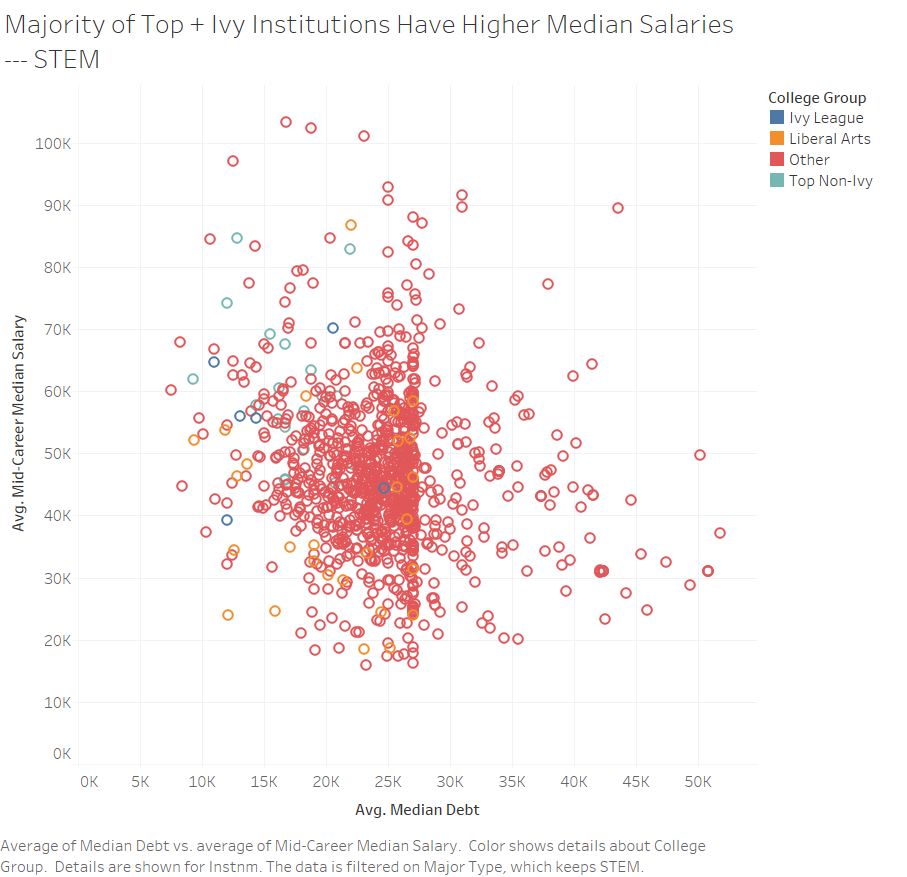

In [0]:
Image(filename="Plt STEM.png")

**Figure 2: Humanities Students from Top + Ivy Institutions Have Higher Median Salaries**

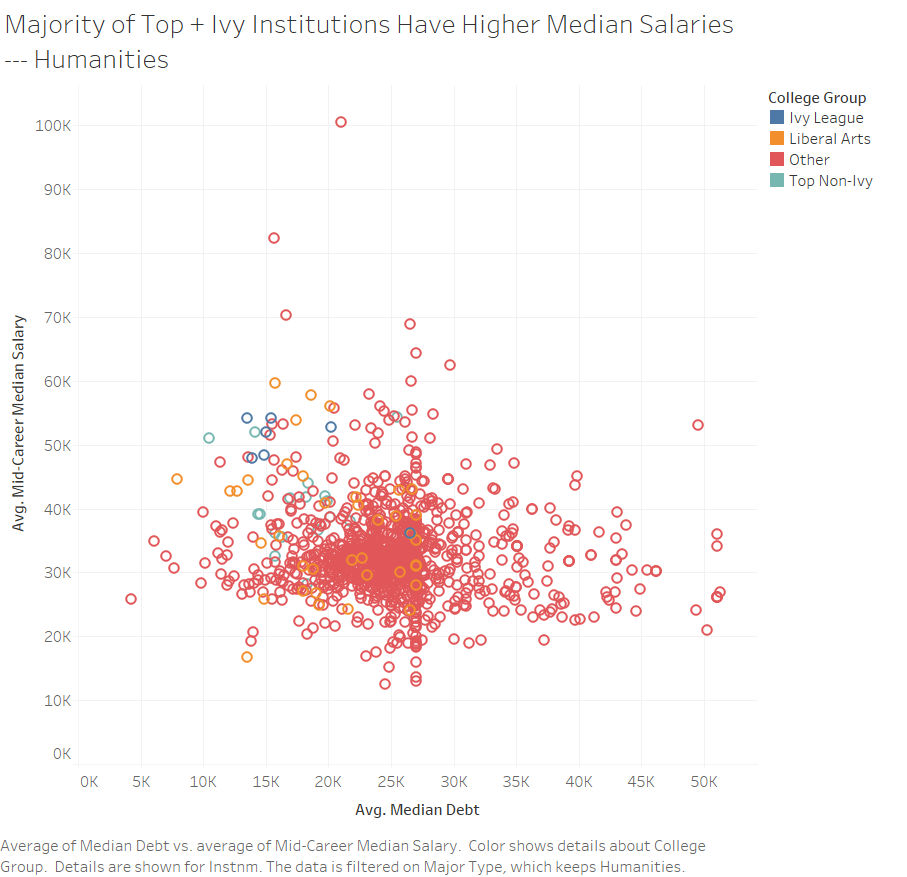

In [0]:
Image(filename="Plt Humanities.png")

Next, we used Pandas' groupby feature to organize our data into subgroups. We chose to group by the subject of the major, as well as the ranking of the school. Overall, we had eight subgroups, which were:
*  Humanities majors in the Ivy league
*  Humanities majors at liberal arts schools
*  Humanities majors at Top 30 Non-Ivies
*  Humanities majors at the remaining schools
*  STEM majors in the Ivy league
*  STEM majors at liberal arts schools
*  STEM majors at Top 30 Non-Ivies
*  STEM majors at the remaining schools

Within each subgroup, we used the mean aggregate, looking at both the monetary value of students' median starting salary, and the debt to salary ratios. We visually depicted these means with bar graphs, along with a scatterplot that more directly shows the relationship between median debt and median starting salaries for individual schools.

All the corresponding graphs were made through Tableau.

In [0]:
humanities_df = final_filter.groupby(['Major Category', 'Top Schools'])['Debt to Salary Ratio'].mean()
humanities_df

Major Category  Top Schools 
Humanities      Ivy League      0.463042
                Liberal Arts    0.657273
                Other           0.825290
                Top Non-Ivy     0.490668
STEM            Ivy League      0.327300
                Liberal Arts    0.634060
                Other           0.615623
                Top Non-Ivy     0.344006
Name: Debt to Salary Ratio, dtype: float64

**Figure 3: Students From Top + Ivy Institutions Have Lower Debt-to-Salary Ratios**

Understanding that how "well-off" a college graduate is is contingent on how much debt/earnings they have, we decided to use the debt to salary ratio as a metric to calculate the return on investment of a college education. The lower the score, the presumably more "well off" a student is and vice versa. 



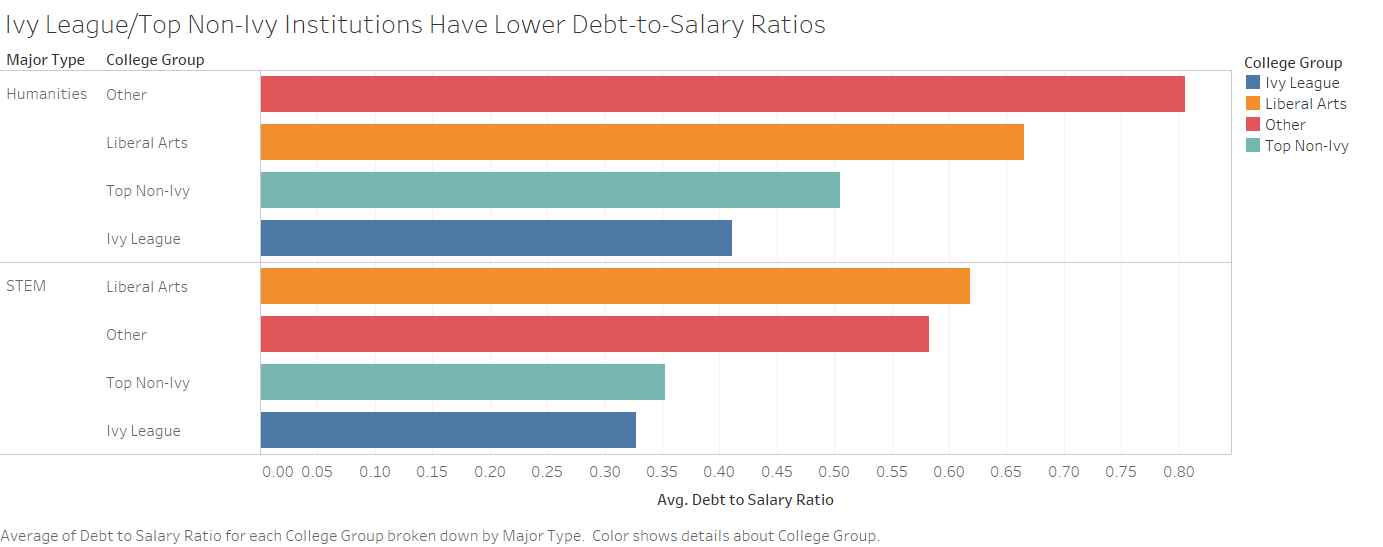

In [0]:
Image(filename="Cat v DS.png", width=1000, height=400)

In [0]:
humanities_df2 = final_filter.groupby(['Major Category', 'Top Schools'])['MD_EARN_WNE'].mean()
humanities_df2

Major Category  Top Schools 
Humanities      Ivy League      45956.862745
                Liberal Arts    36130.769231
                Other           32107.163992
                Top Non-Ivy     39958.301158
STEM            Ivy League      57938.775510
                Liberal Arts    41034.831461
                Other           45668.360196
                Top Non-Ivy     58833.620690
Name: MD_EARN_WNE, dtype: float64

**Figure 4: On Average, Students from Ivy/Top Institutions Have Higher Salaries**

Though using salaries to determine ROI (return on investment) is not necessarily the best metric as compared to debt-to-salary ratio, we were still curious whether low debt or high salaries cause Top/Ivy League Institutions to have such low debt-to-salary ratio. We plotted salaries just to satiate our curiosity. 

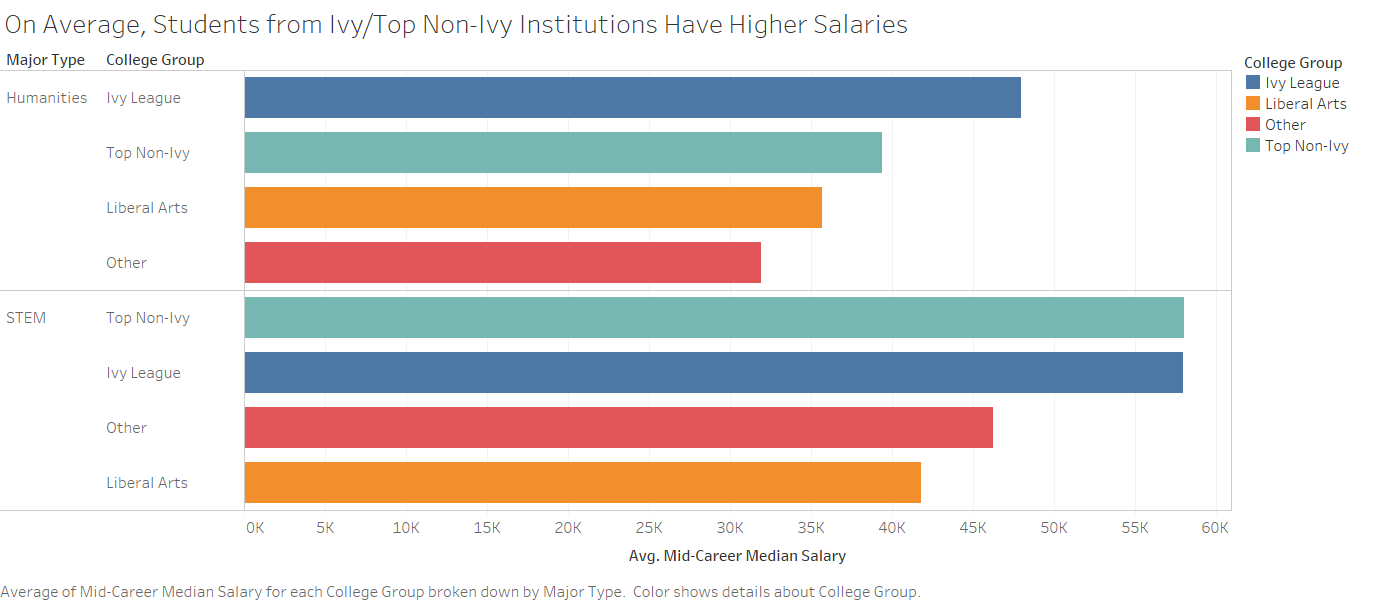

In [0]:
Image(filename="Cat v Salary.png", width=1000, height=450)

In [0]:
stem_df = final_filter.groupby(['Major Category'])['Debt to Salary Ratio'].mean()
stem_df.head()

Major Category
Humanities    0.81346
STEM          0.60717
Name: Debt to Salary Ratio, dtype: float64

In [0]:
stem_df2 = final_filter.groupby(['Major Category'])['MD_EARN_WNE'].mean()
stem_df2.head()

Major Category
Humanities    32409.478470
STEM          46031.459919
Name: MD_EARN_WNE, dtype: float64

After that, we looked at average median starting salaries and average debt to salary ratios based on regions, which was one of the questions we sought to answer throughout the research. We made a map for the corresponding values since the graph type enables information to be read/understood very quickly. 

In [0]:

regions = ct_and_region.groupby(['Region'])['Starting Median Salary'].mean()
regions

Region
California      50142.307692
Midwestern      43620.000000
Northeastern    49440.298507
Southern        44166.666667
Western         44065.789474
Name: Starting Median Salary, dtype: float64

In [0]:
regions2 = overall_indivs.groupby(['Region'])['Debt to Salary Ratio'].mean()
regions2

Region
California      0.515399
Midwestern      0.648577
Northeastern    0.604537
Southern        0.631001
Western         0.626287
Name: Debt to Salary Ratio, dtype: float64

**Figure 5: Students Attending Schools in the California/Northeast Have Lower Debt-Salary Ratios than Counterpart Regions**

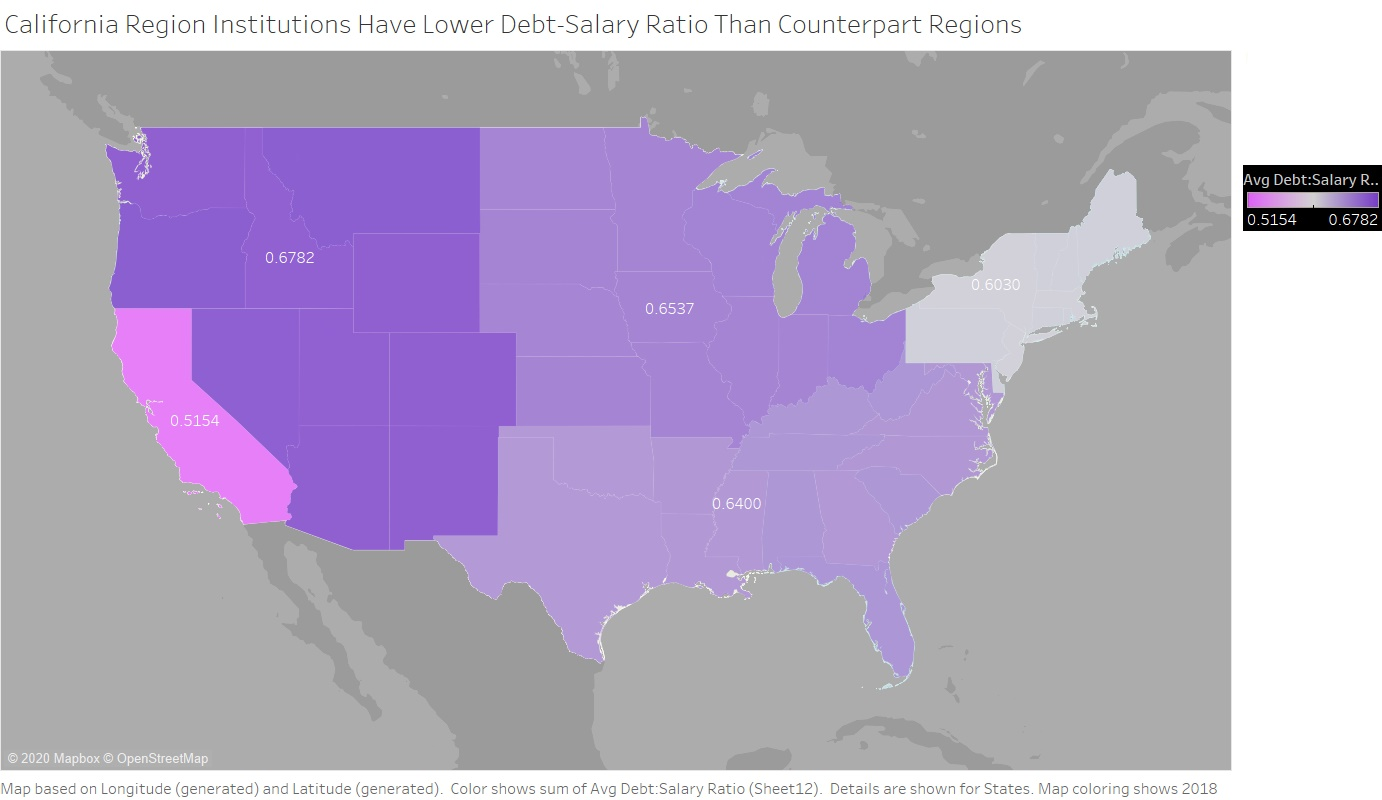

In [3]:
Image(filename="New Mep.jpg", width=1000, height=574)

Lastly, we wanted to see the overall difference in return on investment of the four ranking categories, using debt-to-salary ratio as our metric. The results showed a stark contrast.

In [0]:
worth_it = final_filter.groupby(['Top Schools'])['Debt to Salary Ratio'].mean()
worth_it

Top Schools
Ivy League      0.396529
Liberal Arts    0.649998
Other           0.734234
Top Non-Ivy     0.421369
Name: Debt to Salary Ratio, dtype: float64

**Figure 6: Ivy League Institutions Have a Lower Debt to Salary Ratio than Counterpart College Groups**

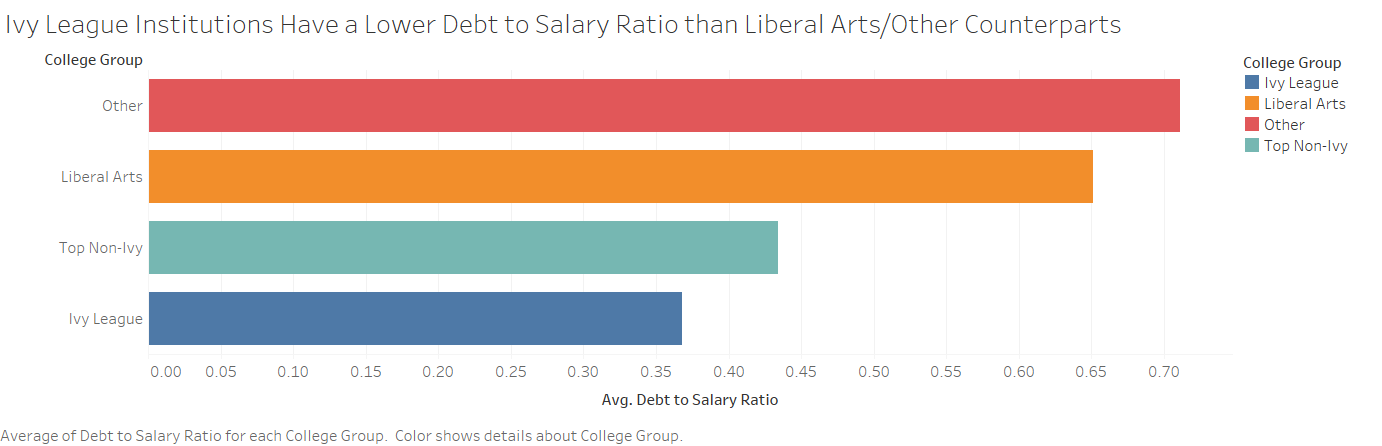

In [0]:
Image(filename="Overall DS.png", width=1000, height=370)

**Other Findings** *(Excluded from conclusion)*

We also looked at the average median starting salaries and debt to salary ratios for each of the 50 majors, and even the almost 2000 different colleges, but didn't ultimately use the information in our conclusion.

In [0]:
major_df = final_filter.groupby(['CIPDESC'])['MD_EARN_WNE'].mean()
major_df

CIPDESC
Accounting                              45295.938375
Aerospace Engineering                   60969.230769
Agriculture                             40117.213115
Anthropology                            24992.105263
Architecture                            45681.196581
Art History                             23356.486486
Biology                                 30412.087912
Business Management                     40519.527363
Chemical Engineering                    60485.567010
Chemistry                               36384.426230
Civil Engineering                       52847.265625
Communications                          31182.534611
Computer Engineering                    63659.615385
Computer Science                        54687.281796
Construction                            60848.750000
Criminal Justice                        32828.881279
Drama                                   21673.983740
Economics                               46377.811550
Education                             

In [0]:
major_df2 = final_filter.groupby(['CIPDESC'])['Debt to Salary Ratio'].mean()
major_df2

CIPDESC
Accounting                              0.613864
Aerospace Engineering                   0.396476
Agriculture                             0.555940
Anthropology                            0.896839
Architecture                            0.593181
Art History                             1.141216
Biology                                 0.779751
Business Management                     0.668718
Chemical Engineering                    0.386648
Chemistry                               0.621462
Civil Engineering                       0.452903
Communications                          0.804072
Computer Engineering                    0.466748
Computer Science                        0.594469
Construction                            0.406723
Criminal Justice                        0.872263
Drama                                   1.167410
Economics                               0.475594
Education                               0.742666
Electrical Engineering                  0.424023
English     

In [0]:
pd.set_option('display.max_rows', 500)
major_ranking = final_filter.groupby(['CIPDESC', 'Top Schools'])['Debt to Salary Ratio'].mean()
major_ranking

CIPDESC                               Top Schools 
Accounting                            Ivy League      0.692846
                                      Liberal Arts    0.437377
                                      Other           0.616727
                                      Top Non-Ivy     0.268452
Aerospace Engineering                 Other           0.404612
                                      Top Non-Ivy     0.298854
Agriculture                           Ivy League      0.266456
                                      Other           0.563238
Anthropology                          Liberal Arts    0.849555
                                      Other           0.915649
                                      Top Non-Ivy     0.628842
Architecture                          Ivy League      0.361570
                                      Other           0.602130
                                      Top Non-Ivy     0.467730
Art History                           Ivy League      0.360026
    

In [0]:
major_ranking2 = final_filter.groupby(['CIPDESC', 'Top Schools'])['MD_EARN_WNE'].mean()
major_ranking2

CIPDESC                               Top Schools 
Accounting                            Ivy League       39000.000000
                                      Liberal Arts     54900.000000
                                      Other            45116.619318
                                      Top Non-Ivy      70266.666667
Aerospace Engineering                 Other            60041.666667
                                      Top Non-Ivy      72100.000000
Agriculture                           Ivy League       53333.333333
                                      Other            39784.033613
Anthropology                          Liberal Arts     23300.000000
                                      Other            24761.931818
                                      Top Non-Ivy      28650.000000
Architecture                          Ivy League       48400.000000
                                      Other            45499.090909
                                      Top Non-Ivy      48566.6666

In [0]:
indiv_college = final_filter.groupby(['INSTNM'])['Debt to Salary Ratio'].mean()
indiv_college

INSTNM
AI Miami International University of Art and Design    1.576368
AIB College of Business                                0.568201
Abilene Christian University                           0.555493
Abraham Baldwin Agricultural College                   0.641360
Academy of Art University                              1.246697
                                                         ...   
Xavier University of Louisiana                         1.254069
Yale University                                        0.274672
Yeshiva University                                     0.315057
York College of Pennsylvania                           0.775935
Youngstown State University                            0.846426
Name: Debt to Salary Ratio, Length: 1997, dtype: float64

In [0]:
ct_and_region.to_csv('Colleges by region.csv')
overall_indivs.to_csv('Merged file.csv')
final_filter.to_csv('Majors by college.csv')

In [0]:
from google.colab import files
files.download("Colleges by region.csv")
files.download("Merged file.csv")
files.download("Majors by college.csv")


**Conclusion**

Overall, there were many assumptions we had to make that could've affected the integrity of the data. We assumed that we would still have a representative sample of colleges after removing all the PrivacySuppressed and nil values. For all we know, many "other" schools who do produce well-paid students, but didn't disclose the required information, could've increased the averages. Additionally, we did not take into account other factors that would delay/speed up the process of paying off one's debt. For example, a higher salary may be favorable, but not if your job's location is expensive to live in. It might take longer to pay off the debt just because of additional costs. 

Futhermore, the Kaggle dataset didn't have nearly as many colleges as the CSC dataset. So, when we conducted the merge, we lost potentially critical information about more than half of our CSC sample. This could've affected our average median starting salaries with regards to location.

Lastly, we made the call to group majors in binary categories. However, the interdisciplinary nature of many majors means that aspects of it can qualify as both STEM and humanities, meaning the "profitability" of STEM and humanities may not necessarily be as clear as it seems.